<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Toronto</font></h1>

## Introduction

In this notebook I've followed the same procedures that were used in the lab that dealt with the clustering of neighborhoods in New York, however I had to undertake in extra steps of data processing before using the k-means cluster algorithm. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in Toronto</a>

3. <a href="#item4">Cluster Neighborhoods</a>

4. <a href="#item5">Exploring the clusters</a>    
</font>
</div>

## 1. Download and Explore Dataset

In [133]:
import pandas
import requests
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
my_table = pandas.read_html(url,match='.+', flavor=['lxml'],header=0)[0]
my_table = my_table.rename(columns={'Postcode':'PostalCode'})
my_table.head(10)

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


To start with the project I've downloaded the data using the read_html method from the Pandas library and renamed the column Postcode to PostalCode in order to match the dataframe that was required for the first assignment.

In [134]:
my_table = my_table[my_table.Borough != 'Not assigned'].reindex()

In this line of code I've removed all postal codes that weren't assigned to a Borough.

In [135]:
my_table.head(10)

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [136]:
toronto_nb = my_table.groupby('PostalCode')['Neighbourhood'].apply(', '.join).reset_index()
toronto_nb.sort_values(by='PostalCode',inplace=True)
toronto_nb.set_index('PostalCode',inplace=True)
toronto_nb.head(10)

,Neighbourhood
PostalCode,
M1B,"Rouge, Malvern"
M1C,"Highland Creek, Rouge Hill, Port Union"
M1E,"Guildwood, Morningside, West Hill"
M1G,Woburn
M1H,Cedarbrae
M1J,Scarborough Village
M1K,"East Birchmount Park, Ionview, Kennedy Park"
M1L,"Clairlea, Golden Mile, Oakridge"
M1M,"Cliffcrest, Cliffside, Scarborough Village West"


In this line of code I've created a new dataframe that combines neighbourhoods that fall under the same postal code.

In [137]:
borough_df = my_table
borough_df = borough_df.drop(['Neighbourhood'], axis=1)
borough_df.sort_values(by='PostalCode',inplace=True)
borough_df.drop_duplicates(inplace=True)
borough_df.set_index('PostalCode',inplace=True)
borough_df.head()

,Borough
PostalCode,
M1B,Scarborough
M1C,Scarborough
M1E,Scarborough
M1G,Scarborough
M1H,Scarborough


In this line of code I've combined both dataframes to result in the third step of the assignment.

In [138]:
toronto_nb['Borough'] = borough_df['Borough']

In [139]:
toronto_nb.reset_index(inplace=True)

In [140]:
toronto_nb = toronto_nb[['PostalCode','Borough','Neighbourhood']]

In this line of code I've assigned the the value of the borough column to all postal codes that weren't assigned a value for Neighbourhood.

In [141]:
index = 0
while index < len(toronto_nb):
    if toronto_nb['Neighbourhood'][index] == 'Not assigned':
           toronto_nb['Neighbourhood'][index] = toronto_nb['Borough'][index] 
    index = index+1

In [142]:
toronto_nb.head(10)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


The shape of the resulting dataframe is:

In [143]:
toronto_nb.shape

(103, 3)

## 2. Explore Neighborhoods in Toronto

I choose to get the coordinates of latitude and longitude from the link provided in the assignment. \n
Therefore, I've downloaded and combined the data with the previous dataframe.

In [144]:
!wget -q -O 'toronto_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [145]:
geodata = pandas.read_csv('toronto_data.csv', delimiter = ',')

In [146]:
geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [147]:
toronto_nb['Latitude'] = geodata['Latitude']
toronto_nb['Longitude'] = geodata['Longitude']

In [148]:
toronto_nb.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Then I've decided to see how many boroughs there were in my dataframe.

In [149]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_nb['Borough'].unique()),
        toronto_nb.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


And their names:

In [150]:
toronto_nb['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

Taking into account the suggestion that the assignment page made, I decided to restrict my observations to boroughs that had toronto in their names:

In [151]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import folium # map rendering library

In [152]:
toronto_named_boroughs =['East Toronto', 'Central Toronto', 'Downtown Toronto','West Toronto']
toronto_data = toronto_nb.loc[toronto_nb['Borough'].isin(toronto_named_boroughs)]
#toronto_data

Then I used the code from the clustering lab to generate a map of toronto so that I could see where the neighborhoods were located:

In [153]:
address = 'Toronto, TO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6523873, -79.3835641.


In [154]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## 3. Cluster Neighborhoods

In [155]:
CLIENT_ID = 'J1ZT0FMNMMSBP5CIFPJ4HKVB3D43OATGVKCPNVIK4TY41ZKV' # your Foursquare ID
CLIENT_SECRET = 'LJAEYUT5KMHKJLFXWMCEB5KSNVICGTNNQECG5QELLVMUOCPH' # your Foursquare Secret
VERSION = '20190621' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: J1ZT0FMNMMSBP5CIFPJ4HKVB3D43OATGVKCPNVIK4TY41ZKV
CLIENT_SECRET:LJAEYUT5KMHKJLFXWMCEB5KSNVICGTNNQECG5QELLVMUOCPH


I reused the code from the clustering lab to cluster the neighborhoods:

In [156]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pandas.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [157]:
LIMIT = 100
radius = 500
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [158]:
print(toronto_venues.shape)
toronto_venues.head()

(1700, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


In [159]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,88,88,88,88,88,88
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,15,15,15,15,15,15


In [160]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 238 uniques categories.


In [161]:
# one hot encoding
toronto_onehot = pandas.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
toronto_onehot.shape

(1700, 238)

In [163]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head(10)

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.0
1,Berczy Park,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,"Brockton, Exhibition Place, Parkdale Village",0.045455,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.052632,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.125,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,Central Bay Street,0.011364,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.011364,0.000000,0.011364,0.000000,0.011364,0.000000,0.0
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.01,0.0,0.0,0.060000,0.000000,0.000000,0.030000,0.010000,0.000000,0.0
8,Christie,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,Church and Wellesley,0.011494,0.011494,0.011494,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.00,0.0,0.0,0.000000,0.011494,0.000000,0.011494,0.000000,0.011494,0.0


In [164]:
toronto_grouped.shape

(38, 238)

In [165]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [166]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pandas.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,American Restaurant,Steakhouse,Thai Restaurant,Cosmetics Shop,Hotel,Restaurant,Burger Joint
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Cheese Shop,Farmers Market,Steakhouse,Bakery,Beer Bar,Italian Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Café,Breakfast Spot,Yoga Studio,Italian Restaurant,Convenience Store,Pet Store,Climbing Gym,Restaurant,Caribbean Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Pizza Place,Gym / Fitness Center,Recording Studio,Restaurant,Butcher,Burrito Place,Brewery,Skate Park
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Coffee Shop,Sculpture Garden,Bar,Boutique,Plane,Airport Gate


Then I used the elbow method to determine the best number of clusters to use:

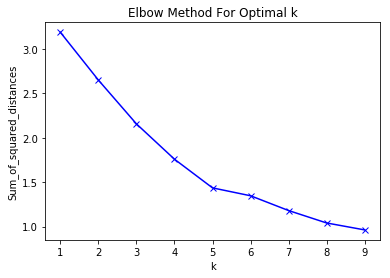

In [167]:
# run k-means clustering
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(init="k-means++",n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [168]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(init="k-means++",n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       4, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [169]:
toronto_merged = toronto_data
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels']= kmeans.labels_
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged.dropna(inplace=True)
toronto_merged.head(20) # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,Health Food Store,Other Great Outdoors,Pub,Trail,Falafel Restaurant,Event Space,Ethiopian Restaurant,Farmers Market,Diner,Fast Food Restaurant,0
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Yoga Studio,Pizza Place,Brewery,Bubble Tea Shop,Café,0
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,Park,Pizza Place,Italian Restaurant,Pet Store,Gym,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint,0
43,M4M,East Toronto,Studio District,43.659526,-79.340923,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym / Fitness Center,Brewery,Seafood Restaurant,0
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,Park,Swim School,Bus Line,Women's Store,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,4
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197,Playground,Hotel,Food & Drink Shop,Clothing Store,Park,Sandwich Place,Breakfast Spot,Grocery Store,Gym,Ethiopian Restaurant,0
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,Coffee Shop,Yoga Studio,Bagel Shop,Fast Food Restaurant,Mexican Restaurant,Diner,Dessert Shop,Park,Clothing Store,Chinese Restaurant,0
47,M4S,Central Toronto,Davisville,43.704324,-79.388790,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Thai Restaurant,Restaurant,Café,Coffee Shop,Italian Restaurant,Deli / Bodega,0
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,Playground,Tennis Court,Diner,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,1
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,Pub,Coffee Shop,Light Rail Station,Bagel Shop,Fried Chicken Joint,Supermarket,Sports Bar,American Restaurant,Sushi Restaurant,Pizza Place,0


Finally I created a map to visualize the clusters that I happened to find:

In [170]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Exploring the clusters

The first cluster is mostly formed by neighbourhoods with many food related venues as well as some entertainment ones.

In [171]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
37,East Toronto,Health Food Store,Other Great Outdoors,Pub,Trail,Falafel Restaurant,Event Space,Ethiopian Restaurant,Farmers Market,Diner,Fast Food Restaurant,0
41,East Toronto,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Yoga Studio,Pizza Place,Brewery,Bubble Tea Shop,Café,0
42,East Toronto,Park,Pizza Place,Italian Restaurant,Pet Store,Gym,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint,0
43,East Toronto,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym / Fitness Center,Brewery,Seafood Restaurant,0
45,Central Toronto,Playground,Hotel,Food & Drink Shop,Clothing Store,Park,Sandwich Place,Breakfast Spot,Grocery Store,Gym,Ethiopian Restaurant,0
46,Central Toronto,Coffee Shop,Yoga Studio,Bagel Shop,Fast Food Restaurant,Mexican Restaurant,Diner,Dessert Shop,Park,Clothing Store,Chinese Restaurant,0
47,Central Toronto,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Thai Restaurant,Restaurant,Café,Coffee Shop,Italian Restaurant,Deli / Bodega,0
49,Central Toronto,Pub,Coffee Shop,Light Rail Station,Bagel Shop,Fried Chicken Joint,Supermarket,Sports Bar,American Restaurant,Sushi Restaurant,Pizza Place,0
51,Downtown Toronto,Coffee Shop,Restaurant,Park,Café,Italian Restaurant,Bakery,Pub,Pizza Place,Pet Store,Breakfast Spot,0
52,Downtown Toronto,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Bubble Tea Shop,Burger Joint,Pub,Hotel,Café,0


The second cluster is comprised of only one neighbourhood, its most common venues are similar to the first cluster, but are centered towards ethnic cuisines.

In [172]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
48,Central Toronto,Playground,Tennis Court,Diner,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,1


In this third cluster we can find the trail venue high up on the rank of most common venue, also they both have eletronics store and park as common venues, hence they clustering together.

In [173]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
50,Downtown Toronto,Park,Playground,Trail,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,2
64,Central Toronto,Trail,Jewelry Store,Sushi Restaurant,Park,Electronics Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Women's Store,2


The fourth cluster has a neighbourhood with food related venues as well as particular venues, such as placing garden in it's 2nd place.

In [174]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
63,Central Toronto,Ice Cream Shop,Garden,Women's Store,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,3


The last one has the unique characteristic of having swim school as its 2nd most common venue.

In [175]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
44,Central Toronto,Park,Swim School,Bus Line,Women's Store,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,4
